In [ ]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [ ]:
os.getcwd()

'c:\\Users\\basti\\OneDrive\\Documents\\Master Data Science-BeezyTop\\SoSe 2024\\Ground Truthing\\Assignment  2'

In [ ]:
current_working_directory = os.getcwd()
main_dir = os.path.join(current_working_directory, "Samples")
species_dir = os.listdir(main_dir)
print(species_dir)

['Acer platanoides', 'Philadelphus coronarius', 'Platanus hybrida', 'Spiraea chamaedryfolia', 'Symphoricarpos albus']


In [ ]:
def calculate_leaf_area(img):
    # Load the image
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to get a binary image
    # Here we use THRESH_BINARY_INV because we want the leaf to be white
    _, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

    plt.imshow(binary_image)
    plt.show()

    # Count the number of white pixels
    white_pixels = cv2.countNonZero(binary_image)

    # DIN A4 paper dimensions in cm (21 cm x 29.7 cm)
    paper_width = 21
    paper_height = 29.7
    paper_area_cm2 = paper_width * paper_height  # Total area in square cm

    # Image dimensions in pixels
    total_pixels = binary_image.size

    # Area per pixel in square cm
    area_per_pixel = paper_area_cm2 / total_pixels


    # Total area of the leaf in square cm
    leaf_area_cm2 = white_pixels * area_per_pixel

    return leaf_area_cm2

Species:  c:\Users\basti\OneDrive\Documents\Master Data Science-BeezyTop\SoSe 2024\Ground Truthing\Assignment  2\Samples\Acer platanoides


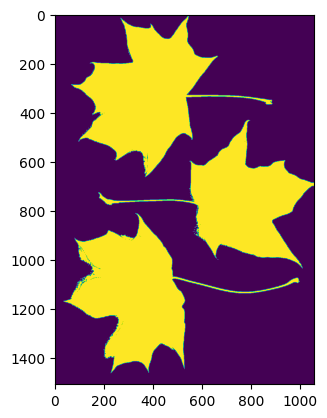

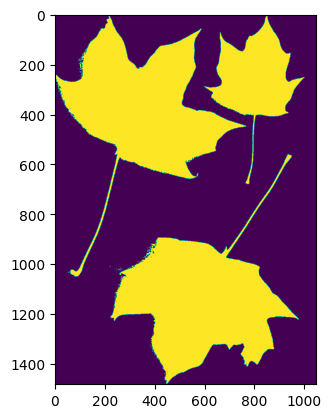

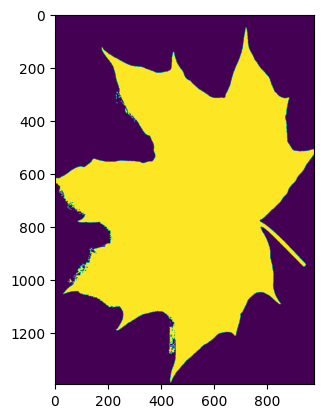

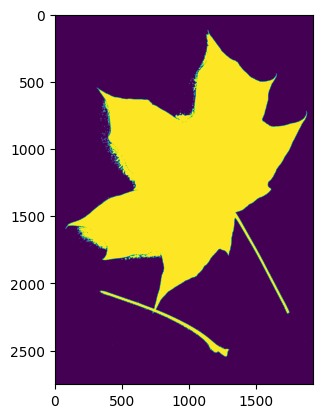

The average area for Acer platanoides is 114.58 square cm
The total area for Acer platanoides is 916.67 square cm
Species:  c:\Users\basti\OneDrive\Documents\Master Data Science-BeezyTop\SoSe 2024\Ground Truthing\Assignment  2\Samples\Philadelphus coronarius


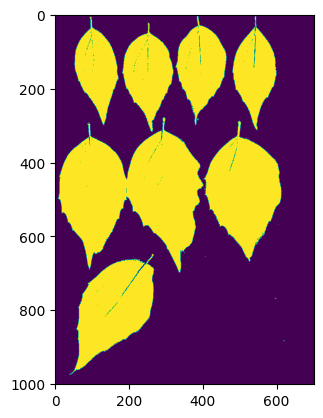

The average area for Philadelphus coronarius is 28.59 square cm
The total area for Philadelphus coronarius is 228.74 square cm
Species:  c:\Users\basti\OneDrive\Documents\Master Data Science-BeezyTop\SoSe 2024\Ground Truthing\Assignment  2\Samples\Platanus hybrida


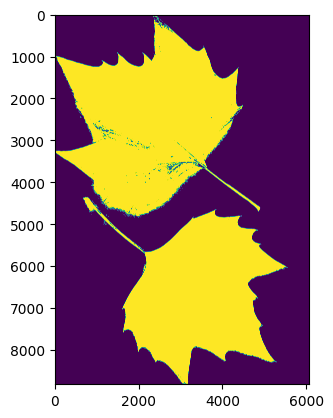

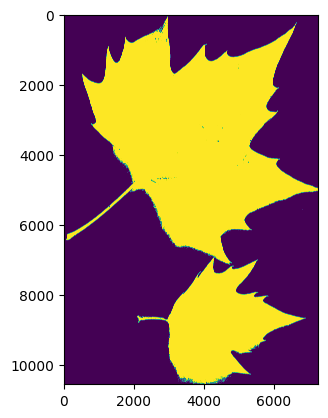

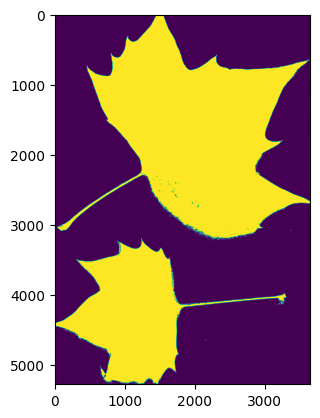

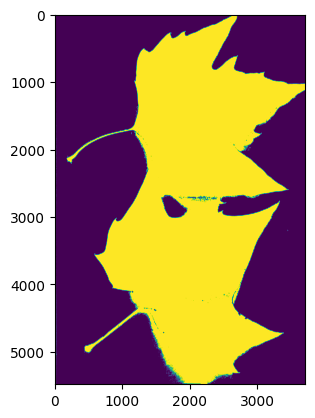

The average area for Platanus hybrida is 127.90 square cm
The total area for Platanus hybrida is 1023.19 square cm
Species:  c:\Users\basti\OneDrive\Documents\Master Data Science-BeezyTop\SoSe 2024\Ground Truthing\Assignment  2\Samples\Spiraea chamaedryfolia


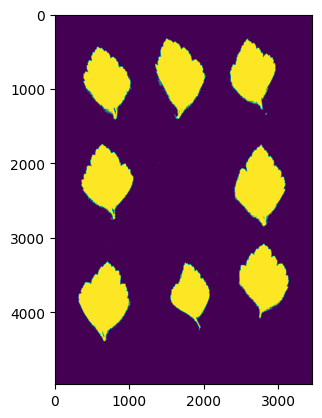

The average area for Spiraea chamaedryfolia is 13.65 square cm
The total area for Spiraea chamaedryfolia is 109.18 square cm
Species:  c:\Users\basti\OneDrive\Documents\Master Data Science-BeezyTop\SoSe 2024\Ground Truthing\Assignment  2\Samples\Symphoricarpos albus


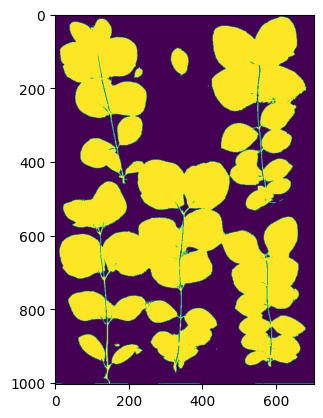

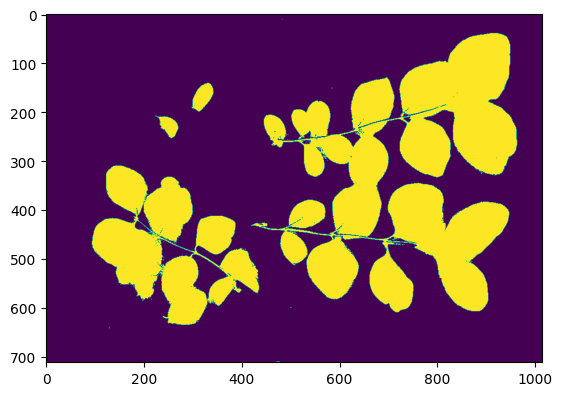

The average area for Symphoricarpos albus is 57.76 square cm
The total area for Symphoricarpos albus is 462.08 square cm


In [ ]:
# Process each species directory
for dirs in species_dir:
    sub_dir = os.path.join(main_dir, dirs)
    print("Species: ", sub_dir)
    if os.path.isdir(sub_dir):  # Check if it's a directory
        files = os.listdir(sub_dir)  # List files in the sub-directory
        total_area_species = 0
        number_of_samples = 8

        # Loop over each file that contains samples
        for file in files:
            if file.endswith('.jpg'):  # Process only JPEG images
                img_file = os.path.join(sub_dir, file)
                area = calculate_leaf_area(img_file) # calculate leaf area for specific file
                total_area_species += area           # add it to the overall leaf area of the species

        avg_area = total_area_species / number_of_samples # get area per leaf
        print(f"The average area for {dirs} is {avg_area:.2f} square cm")
        print(f"The total area for {dirs} is {total_area_species:.2f} square cm")
